## Logistic Regression with ROC curve and ROC AUC score

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
X,y = make_classification(n_samples = 1000,n_classes = 2,random_state=1)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

created a dummy model with deafult 0 as output

In [5]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [6]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Prediction based on probability

In [11]:
model_prob = model.predict_proba(X_test)
model_prob

array([[9.59354198e-01, 4.06458016e-02],
       [3.55102587e-01, 6.44897413e-01],
       [4.61036991e-01, 5.38963009e-01],
       [1.26765534e-01, 8.73234466e-01],
       [3.98492560e-01, 6.01507440e-01],
       [5.89004681e-01, 4.10995319e-01],
       [7.11999710e-02, 9.28800029e-01],
       [7.50321930e-01, 2.49678070e-01],
       [9.54385644e-01, 4.56143559e-02],
       [9.69602884e-01, 3.03971159e-02],
       [1.33956156e-01, 8.66043844e-01],
       [5.31819848e-01, 4.68180152e-01],
       [1.72347404e-01, 8.27652596e-01],
       [9.67809354e-01, 3.21906457e-02],
       [2.30046680e-01, 7.69953320e-01],
       [6.14802703e-01, 3.85197297e-01],
       [5.64943790e-01, 4.35056210e-01],
       [9.92521843e-01, 7.47815672e-03],
       [6.25866400e-01, 3.74133600e-01],
       [9.86718726e-01, 1.32812744e-02],
       [9.84853282e-01, 1.51467175e-02],
       [4.15877937e-02, 9.58412206e-01],
       [8.20879654e-01, 1.79120346e-01],
       [2.69178122e-02, 9.73082188e-01],
       [2.755166

lets focus on positive outcome

In [12]:
model_prob = model_prob[:,1]

Lets calculate scores

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [14]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9232456140350878


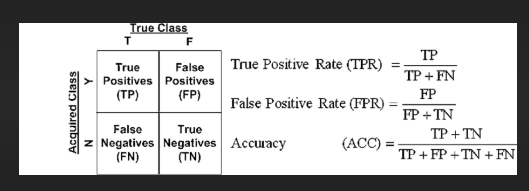
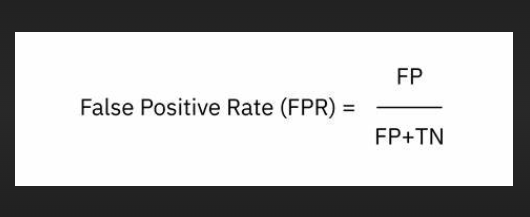

In [15]:
dummy_fpr , dummy_tpr , _ = roc_curve(y_test , dummy_model_prob)
model_fpr,model_tpr,_ = roc_curve(y_test,model_prob) 

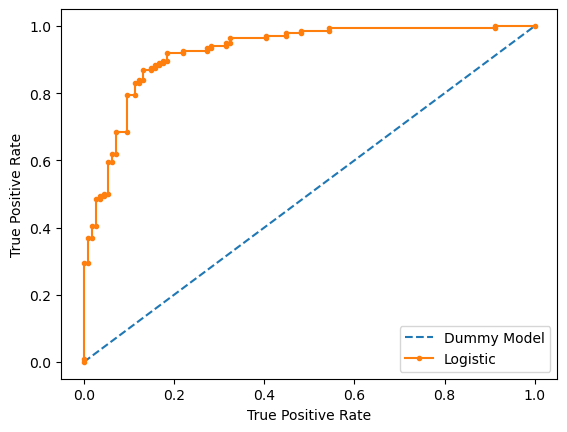

In [17]:
pyplot.plot(dummy_fpr,dummy_tpr,linestyle="--",label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker=".",label='Logistic')

# axis labels
pyplot.xlabel("True Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.show()